# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**TEAM NM1**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [4]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

# Display Matplotlib plots in Jupyter Notebook
%matplotlib inline  

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = '###'

#pd.set_option('max_columns', 100)
#pd.set_option('max_rows', 100)

In [7]:
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 100)

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [8]:
df_train = pd.read_csv('df_train.csv') # load the train dataset, used the pandas read_csv() to import our dataset
df_test = pd.read_csv('df_test.csv') # load the test dataset, used the pandas read_csv() to import our dataset
#Preview the dataset


In [63]:
df_train.head() 

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [64]:
df_test.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


In [9]:
#concatenate the two DataFrames
df = pd.concat([df_train,df_test])#
#display the last few rows of the concatenated DataFrame
df.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,...,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,...,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,...,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,...,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,...,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<b>Check the shape of the dataset</b>
- It is a good practise to first check the sape of the dataset so as to get a general overview of what our dataset is about

In [10]:
# checking the size of the DataFrame for data processing and analysis tasks.
shape = df.shape
print('The shape of the dataset: ', shape)

The shape of the dataset:  (11683, 49)


Now we can see that the dataset contains <b>11683 instances </b>,  <b>48 variables</b> and <b>1 target</b> 
NB: The unnamed intial column contains the ID number of each observation which is negligible .

<b>Summary of the Dataset</b>

<b>Dataset description</b>
- The dataset contains several columns which holds data about the environmental atmospheric conditions of different cities within Spain; <b>(Madrid, Valencia, Seville, Bilbao and Barcelona)</b>.
- Showing the data repressentations of various weather and atmospheric conditions such as <b>Cloud, humidity, wind, rainfall, snow, temparature and pressure</b>
- It also contains both numerical and categorical data with data types ranging between float, integer and object data types.
- The first column without variable name is the observation_ID

<b>Important Points and Variable description of the Dataset</b><br>
<b>Features</b>
- time: Time at which the data was recorded
- {City Name}_wind_speed: The wind speed at a specific time interval for the named city.
- {City Name}_wind_degree: The strength of the wind for the named city at a specific time interval - expressed as a category.
- {City Name}_rain_1h: A metric expressing the amount of rain that has fallen in the past hour in a particular city.
- {City Name}_rain_3h:A metric expressing the amount of rain that has fallen in the past three hours in a particular city.
- {City Name}_humidity: The level of humidity as measured at the defined time for the specific city mentioned.
- {City Name}_clouds_all: The level of cloud coverage as measured at the specified point in time for the specific city mentioned.
- {City Name}_pressure: The atmospheric pressure for the named city at a specific time interval - expressed as a category.
- {City Name}_snow_3h: A metric expressing the amount of snow that has fallen in the past three hours in a particular city.
- {City Name}_weather_id: A metric used to explain the weather condition of a specific city at a specified time.
- {City Name}_temp_max: The maximum temperature for a specific city at a point in time.
- {City Name}_temp_min: The minimum temperature for a specific city at a point in time.
- {City Name}_temp: The average temperature for a specific city at a point in time.<br>

<b>Target Variable</b>
- load_shortfall_3h: The difference between the energy generated by the method of renewable energy sources, such as solar, wind, geothermal, etc., and energy generated with fossil fuels - partitioned in three-hour windows.

<b>Statiscal Properties of the Dataset</b>

In [67]:
# Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333

In [68]:
#retrieve the column labels (names) of a pandas DataFrame df. The columns attribute of a DataFrame returns an Index object containing the column labels.
df.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

<b>Data Cleaning</b>

In [11]:
#This line assigns the DataFrame df to a new variable df_clean. However, it's important to note that this assignment creates a reference to the same DataFrame object rather than creating a new copy of the data. Therefore, changes made to one DataFrame will affect the other.
df_clean = df
#The info() method provides a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

<b>Check for Duplicated variables and instances</b>
- Check through th columns to remove variables with repeating row values. The code retains the first occurence of the variables
- Next cell checks for duplicated values in observation

In [12]:
# Initializes an empty set (seen_values) to keep track of unique column value combinations.
seen_values = set()

#  Initializes an empty list (columns_to_keep) to store the names of columns that have unique value combinations.
columns_to_keep = []
#Iterates over each column in the DataFrame.
for column in df.columns:
#Retrieves the values of the current column.
    column_values = df[column].values
#Converts the column values to a tuple.
    column_tuple = tuple(column_values)
#Checks whether the tuple of column values has been seen before.
    if column_tuple not in seen_values:
#If the tuple is not in seen_values, it adds the tuple to the set of seen values.
        seen_values.add(column_tuple)
#Append the column name to the list of columns to keep.
        columns_to_keep.append(column)

# Create a new DataFrame with only the columns to keep
df_clean = df[columns_to_keep]

In [13]:
# This method is called on the DataFrame and checks for duplicate rows. It returns a boolean Series where True indicates that the corresponding row is a duplicate, and False indicates that the row is unique.
df_clean.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2915    False
2916    False
2917    False
2918    False
2919    False
Length: 11683, dtype: bool

In [149]:
#display the last few rows of the DataFrame
df_clean.tail()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
2915,11678,2018-12-31 09:00:00,0.333333,level_9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,sp24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,NaN,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN
2916,11679,2018-12-31 12:00:00,0.333333,level_8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,sp24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,NaN,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN
2917,11680,2018-12-31 15:00:00,1.000000,level_6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,NaN,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN
2918,11681,2018-12-31 18:00:00,1.000000,level_6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,sp23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,NaN,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN
2919,11682,2018-12-31 21:00:00,1.333333,level_10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,sp23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,NaN,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN


In [150]:
#The code df_clean.isnull().sum() is used to count the number of missing (null or NaN) values in each column of the DataFrame df_clean.
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

- Correcting for missing values in the predictor variables
- Converting the variables into numeric data types

In [14]:
#fill missing values in the 'Valencia_pressure' column of the DataFrame df_clean with the mode (most frequently occurring value) of that column. 
df_clean['Valencia_pressure'] = df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode()[0])

In [15]:
#selects the 'Valencia_wind_deg' column from the DataFrame df_clean, extract numeric digits (\d+) from each element in the 'Valencia_wind_deg' column using a regular expression. 
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
#convert the values in the 'Valencia_wind_deg' column to numeric format. This is important because the str.extract() method returns the extracted values as strings, and converting them to numeric format can be useful for subsequent numerical operations.
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
#print or display the 'Valencia_wind_deg' column after the above transformations.
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [16]:
#extract numeric digits (\d+) from each element in the 'Seville_pressure'.
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
#convert the extracted values in the 'Seville_pressure' column to numeric format. 
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
#prints or displays the 'Seville_pressure' column after the above transformations.
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [17]:
#convert the values in the 'time' column to datetime format using the to_datetime function from pandas. This is often done to ensure that the 'time' column is treated as datetime objects, enabling various datetime operations.
df_clean['time'] = pd.to_datetime(df_clean['time'])
#This line extracts the year component from the 'time' column and creates a new column 'Year' with these values.
df_clean['Year'] = df_clean['time'].dt.year
#This line extracts the month component from the 'time' column and creates a new column 'Month' with these values.
df_clean['Month'] = df_clean['time'].dt.month
#This line extracts the day component from the 'time' column and creates a new column 'Day' with these values.
df_clean['Day'] = df_clean['time'].dt.day
#This line extracts the hour component from the 'time' column and creates a new column 'Hour' with these values.
df_clean['Hour'] = df_clean['time'].dt.hour
#This line extracts the minute component from the 'time' column and creates a new column 'Minute' with these values.
df_clean['Minute'] = df_clean['time'].dt.minute
#This line extracts the second component from the 'time' column and creates a new column 'Second' with these values.
df_clean['Second'] = df_clean['time'].dt.second

df_clean['load_shortfall_3h'] = df_clean['load_shortfall_3h'].fillna(df_clean['load_shortfall_3h'].mean())

In [155]:
#retrieve the dimensions (number of rows and columns) of the DataFrame df_clean. The shape attribute of a DataFrame returns a tuple representing the dimensions in the form (number_of_rows, number_of_columns).
df_clean.shape

(11683, 55)

DROP REDUNDANT VARIABLES

In [18]:
#remove columns from the DataFrame. The list ['Unnamed: 0', 'time'] contains the names of the columns to be dropped. The axis=1 argument indicates that the operation should be applied along columns.
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis=1)

In [157]:
#display the last few rows of the DataFrame
df_clean.tail()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Year,Month,Day,Hour,Minute,Second
2915,0.333333,9,0.0,2.000000,81.666667,49.666667,80.000000,1.333333,0.0,70.000000,6.333333,320.000000,0.0,2.000000,0.0,24,0.0,0.0,1029.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.666667,800.0,1018.0,280.816667,1031.666667,279.816667,279.323333,734.333333,280.210000,69.666667,278.816667,279.816667,281.483333,278.140000,270.816667,273.210000,276.483333,276.150000,279.816667,274.910000,271.150000,NaN,2018,12,31,9,0,0
2916,0.333333,8,0.0,1.333333,61.000000,28.333333,56.666667,1.000000,0.0,36.666667,2.666667,293.333333,0.0,4.000000,0.0,24,0.0,0.0,1028.666667,0.0,0.0,0.0,0.0,800.0,800.0,1034.333333,800.0,1018.0,287.483333,1031.333333,290.816667,290.323333,747.666667,287.280000,32.000000,289.816667,286.483333,287.816667,286.150000,278.150000,278.443333,285.816667,278.816667,287.150000,283.156667,280.483333,NaN,2018,12,31,12,0,0
2917,1.000000,6,0.0,3.000000,47.000000,26.333333,0.000000,0.666667,0.0,14.666667,2.666667,233.333333,0.0,4.666667,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.000000,800.0,1018.0,290.816667,1030.000000,293.483333,293.483333,800.000000,290.816667,23.666667,293.483333,289.483333,288.816667,288.820000,284.150000,285.073333,288.150000,285.816667,290.816667,287.733333,286.483333,NaN,2018,12,31,15,0,0
2918,1.000000,6,0.0,2.000000,52.666667,56.666667,0.000000,0.666667,0.0,19.000000,2.333333,253.333333,0.0,3.333333,0.0,23,0.0,0.0,1027.000000,0.0,0.0,0.0,0.0,800.0,800.0,1033.333333,800.0,1018.0,288.816667,1030.333333,286.483333,285.976667,800.000000,288.300000,59.000000,285.483333,285.816667,285.150000,284.473333,280.150000,281.626667,283.150000,282.816667,287.483333,283.813333,282.150000,NaN,2018,12,31,18,0,0
2919,1.333333,10,0.0,2.333333,61.666667,69.333333,0.000000,1.333333,0.0,120.000000,4.666667,310.000000,0.0,3.666667,0.0,23,0.0,0.0,1028.000000,0.0,0.0,0.0,0.0,800.0,800.0,1034.000000,800.0,1018.0,284.816667,1030.666667,281.150000,280.313333,800.000000,284.423333,79.000000,279.483333,283.816667,276.816667,281.133333,276.150000,276.450000,278.483333,276.816667,283.816667,276.623333,276.483333,NaN,2018,12,31,21,0,0


In [158]:
#Lets output a list of the column names in df_clean after the specified columns ('Unnamed: 0' and 'time') have been dropped. 
df_clean.columns

Index(['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madri

In [19]:
#specifies the desired order of columns.
column_order = ['Year', 'Month', 'Day', 'Hour', 
                #'Minute', 'Second', 
        'Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Valencia_snow_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Seville_temp_max', 'Madrid_pressure',
       'Valencia_temp_max', 'Valencia_temp', 'Bilbao_weather_id',
       'Seville_temp', 'Valencia_humidity', 'Valencia_temp_min',
       'Barcelona_temp_max', 'Madrid_temp_max', 'Barcelona_temp',
       'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_min',
       'Bilbao_temp_max', 'Seville_temp_min', 'Madrid_temp', 'Madrid_temp_min',
       'load_shortfall_3h'] # Define the dsired order of column
#create a new DataFrame (dataframe) by selecting columns from df_clean based on the order specified in the column_order list.
dataframe = df_clean[column_order]


In [160]:
##The info() method provides a concise summary of the DataFrame.
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  11683 non-null  int64  
 1   Month                 11683 non-null  int64  
 2   Day                   11683 non-null  int64  
 3   Hour                  11683 non-null  int64  
 4   Madrid_wind_speed     11683 non-null  float64
 5   Valencia_wind_deg     11683 non-null  int64  
 6   Bilbao_rain_1h        11683 non-null  float64
 7   Valencia_wind_speed   11683 non-null  float64
 8   Seville_humidity      11683 non-null  float64
 9   Madrid_humidity       11683 non-null  float64
 10  Bilbao_clouds_all     11683 non-null  float64
 11  Bilbao_wind_speed     11683 non-null  float64
 12  Seville_clouds_all    11683 non-null  float64
 13  Bilbao_wind_deg       11683 non-null  float64
 14  Barcelona_wind_speed  11683 non-null  float64
 15  Barcelona_wind_deg  

In [161]:
#retrieve the dimensions (number of rows and columns) of the DataFrame.
dataframe.shape

(11683, 51)

In [162]:
# retrieve Statiscal Properties of the Dataset which helps us to view the Statiscal Properties of numerical variables in the dataset, it excludes character variables
dataframe.describe()

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,2016.500300,6.525122,15.735256,10.498844,2.433750,5.476590,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,12.780193,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1013.567063,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,1.117584,3.447945,8.798064,6.873990,1.831762,2.863384,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,7.270223,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.146984,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2016.000000,4.000000,8.000000,4.500000,1.000000,3.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1012.333333,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,2016.000000,7.000000,16.000000,9.000000,2.000000,5.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,13.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1016.666667,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,2

In [20]:
#calculate the kurtosis of the 'load_shortfall_3h' column. Kurtosis is a measure of the "tailedness" or shape of the distribution. Positive kurtosis indicates a relatively sharp peak and heavy tails, while negative kurtosis indicates a flatter peak and light tails.
print("Kurtosis: %f" % dataframe['load_shortfall_3h'].kurt())
#calculate the skewness of the 'load_shortfall_3h' column. Skewness measures the asymmetry of the distribution. Positive skewness indicates a right-skewed distribution (tail on the right), while negative skewness indicates a left-skewed distribution (tail on the left).
print("Skewness: %f" % dataframe['load_shortfall_3h'].skew())
#calculates the skewness for all columns in the DataFrame. return a Series with the skewness values for each column.
dataframe.skew()

Kurtosis: -0.118999
Skewness: -0.384847


Year                     0.000169
Month                   -0.009772
Day                      0.006368
Hour                     0.000539
Madrid_wind_speed        1.452792
Valencia_wind_deg        0.002434
Bilbao_rain_1h           5.694539
Valencia_wind_speed      3.116352
Seville_humidity        -0.366033
Madrid_humidity         -0.076590
Bilbao_clouds_all       -0.068335
Bilbao_wind_speed        1.602522
Seville_clouds_all       1.765104
Bilbao_wind_deg          0.246848
Barcelona_wind_speed     1.072417
Barcelona_wind_deg      -0.140337
Madrid_clouds_all        1.158486
Seville_wind_speed       1.213437
Barcelona_rain_1h        9.833191
Seville_pressure         0.032323
Seville_rain_1h          7.535944
Bilbao_snow_3h          30.237039
Barcelona_pressure      66.949053
Seville_rain_3h         22.349167
Madrid_rain_1h           6.446514
Barcelona_rain_3h       14.668923
Valencia_snow_3h        73.090853
Madrid_weather_id       -2.909054
Barcelona_weather_id    -2.595417
Bilbao_pressur

<b>Interpretation</b><br>
- From observation, we can see that <b>Madrid_wind_speed, Valencia_wind_speed, Bilbao_wind_speed, Seville_clouds_all, Madrid_clouds_all, Seville_wind_speed, Barcelona_pressure</b> and <b>Barcelona_wind_speed</b> are highly positively skewed.

- The features <b>Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, Madrid_pressure</b> and <b>Bilbao_weather_id</b> 

- The feature <b>Bilbao_pressure</b> is moderately skewed in a negative direction

- The features <b>Seville_humidity, Bilbao_wind_deg, Barcelona_temp_max, Madrid_temp_max, Barcelona_temp, Bilbao_temp_min,  Bilbao_temp, Bilbao_temp_max, Seville_temp_min, Madrid_temp</b> and <b>Madrid_temp_min</b> are Fairly Symmetrical 

<Axes: xlabel='load_shortfall_3h', ylabel='Density'>

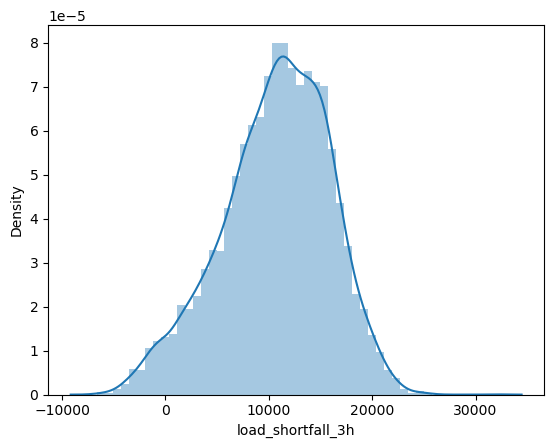

In [21]:
#using the Seaborn library to create a distribution plot (histogram) for the 'load_shortfall_3h' column in the DataFrame dataframe.
sns.distplot(dataframe['load_shortfall_3h'])

<b>We can deduce from the chart that</b>;
- Does not deviate from the normal distribution, has a gradual distribution for the indpendent variable observations
- Have appreciable symmetrical skewness.
- Show peakedness.

<b>Multivariate Analysis</b>

In [22]:
#calculate the pairwise correlation coefficients between numerical columns in the DataFrame dataframe. The resulting correlation DataFrame will show how each numerical column correlates with every other numerical column. 
correlation = dataframe.corr()
correlation

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Year,1.000000,-0.000452,-0.001320,0.000226,-0.011580,0.062176,-0.191407,0.054423,0.041900,0.025770,...,-0.004701,0.003475,-0.025867,0.006234,0.063752,0.057319,-0.078447,-0.003341,-0.002204,0.131324
Month,-0.000452,1.000000,0.009592,0.000226,-0.235733,-0.109152,-0.177464,-0.233550,-0.087993,-0.063884,...,0.202973,0.216035,0.208299,0.246352,0.184902,0.281461,0.221140,0.196907,0.178560,0.199048
Day,-0.001320,0.009592,1.000000,0.000214,-0.038722,-0.025827,0.057068,-0.009837,0.024934,0.016621,...,0.004298,-0.003606,0.003607,0.005728,-0.002441,0.005398,-0.006847,0.009484,0.026238,0.092116
Hour,0.000226,0.000226,0.000214,1.000000,0.188118,-0.171907,0.039779,0.212418,-0.432221,-0.313369,...,0.283683,0.218456,0.271493,0.264344,0.238515,0.249177,0.352601,0.284658,0.258025,0.139285
Madrid_wind_speed,-0.011580,-0.235733,-0.038722,0.188118,1.000000,0.112011,0.247761,0.524549,-0.114347,-0.116172,...,0.064625,0.051990,0.051152,0.036799,0.059285,0.020677,0.077828,0.078077,0.064200,-0.150981
Valencia_wind_deg,0.062176,-0.109152,-0.025827,-0.171907,0.112011,1.000000,0.174800,0.270834,0.276979,0.291152,...,-0.368756,-0.294921,-0.301837,-0.310330,-0.277645,-0.308790,-0.346848,-0.364499,-0.345021,-0.188674
Bilbao_rain_1h,-0.191407,-0.177464,0.057068,0.039779,0.247761,0.174800,1.000000,0.240118,0.063048,0.098192,...,-0.148284,-0.138938,-0.143191,-0.182022,-0.114654,-0.219710,-0.120818,-0.137182,-0.120395,-0.152510
Valencia_wind_speed,0.054423,-0.233550,-0.009837,0.212418,0.524549,0.270834,0.240118,1.000000,-0.095533,-0.029066,...,-0.020645,-0.016290,-0.002094,-0.014087,0.005129,-0.024867,0.002894,-0.012830,-0.024767,-0.142791
Seville_humidity,0.041900,-0.087993,0.024934,-0.432221,-0.114347,0.276979,0.063048,-0.095533,1.000000,0.794435,...,-0.699489,-0.605897,-0.593035,-0.589058,-0.581922,-0.563753,-0.776715,-0.703010,-0.675070,-0.167290
Madrid_humidity,0.025770,-0.063884,0.016621,-0.313369,-0.116172,0.291152,0.098192,-0.029066,0.794435,1.000000,...,-0.798668,-0.677792,-0.626489,-0.620312,-0.636039,-0.590620,-0.764148,-0.795066,-0.757692,-0.150536


The <b>load_shortfall_3h</b> variable is target. So, we should check how each attribute correlates with the target variable. We can do it as follows:-

In [23]:
#extract the correlation coefficients between the 'load_shortfall_3h' column and all other columns in the DataFrame, sorts them in descending order, and stores the result in the corrs Series.
corrs = correlation['load_shortfall_3h'].sort_values(ascending=False)
corrs

load_shortfall_3h       1.000000
Valencia_temp_min       0.201863
Month                   0.199048
Barcelona_temp_min      0.195984
Madrid_temp             0.186036
Barcelona_temp          0.182673
Madrid_temp_max         0.182548
Bilbao_temp_max         0.180934
Bilbao_temp             0.176411
Madrid_temp_min         0.174744
Seville_temp_min        0.174718
Valencia_temp           0.173225
Bilbao_temp_min         0.172920
Barcelona_temp_max      0.164734
Seville_temp            0.159343
Bilbao_weather_id       0.145875
Valencia_temp_max       0.144270
Hour                    0.139285
Year                    0.131324
Seville_temp_max        0.109834
Madrid_pressure         0.092638
Day                     0.092116
Valencia_pressure       0.090405
Barcelona_weather_id    0.063868
Seville_weather_id      0.061104
Valencia_humidity       0.043140
Bilbao_pressure         0.039052
Madrid_weather_id       0.030868
Valencia_snow_3h       -0.021633
Barcelona_rain_3h      -0.024720
Madrid_rai

<b>Heat Map<b>

plt.figure(figsize=(24,20))
plt.title('Correlation Heatmap')
heatmap = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=30)           
plt.show()

<b>Interpretation From the above correlation heat map, we can conclude that :- (Using Pearson Correlation Coefficient) </b>

- The correlation coefficient ranges from -1 to +1.
<br><br>
- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.
<br><br>
- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.
<br><br>
- When it is close to 0, it means that there is no linear correlation. So, there is no correlation between the target and some of the independent variables, they are; <b>Madrid_pressure, Barcelona_weather_id, Seville_weather_id, Valencia_humidity, Bilbao_pressure, Madrid_weather_id, Barcelona_pressure, Seville_wind_speed, Bilbao_wind_speed, Madrid_clouds_all</b> and <b>Seville_clouds_all</b> 
<br>   <br>
- We can see that <b>Valencia_temp_min, Barcelona_temp_min, Madrid_temp, Barcelona_temp, Madrid_temp_max, Bilbao_temp_max , Bilbao_temp, Madrid_temp_min, Seville_temp_min, Valencia_temp, Bilbao_temp_min, Barcelona_temp_max, Seville_temp, Bilbao_weather_id, Valencia_temp_max </b> and <b>Seville_temp_max</b> have weak positive correlation with target variable
<br><br>
- We can also see that <b>Barcelona_wind_speed, Barcelona_wind_deg, Bilbao_wind_deg, Bilbao_clouds_all, Valencia_wind_speed, Madrid_humidity, Madrid_wind_speed</b> and <b>Seville_humidity</b> have weak negative correlation with target variable.

sns.set_style("whitegrid");
sns.pairplot(dataframe, hue="load_shortfall_3h");
plt.show();

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [24]:
#import the Ordinary Least Squares (OLS) class from the formula API of the statsmodels library. Ordinary Least Squares is a method for estimating the parameters of a linear regression model. This API provides a convenient way to specify and fit regression models using a formula syntax similar to the one used in the R programming language.
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
dfm = dataframe.copy()

# The dependent variable:
#y_name = 'load_shortfall_3h'
# The independent variable
# (let's first try all of the columns in the model DataFrame)
#X_names = [col for col in dfm.columns if col != y_name]

y_name = dfm[:len(df_train)][['load_shortfall_3h']]
X_names = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)

# Build the OLS formula string " y ~ X "
#formula_str = y_name+" ~ "+" + ".join(X_names);
#print('Formula:\n\t {}'.format(formula_str))

# Fit the model using the model dataframe
model=ols(formula=formula_str, data=dfm)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

Calculate the Correlation Coefficient

In [25]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'load_shortfall_3h']
for col in column_titles:
#p_val = round(pearsonr(dataframe[col], dataframe['load_shortfall_3h'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col]}

df_cp = pd.DataFrame(dict_cp).T
df_cp

,Correlation_Coefficient
Valencia_temp_min,0.201863
Month,0.199048
Barcelona_temp_min,0.195984
Madrid_temp,0.186036
Barcelona_temp,0.182673
Madrid_temp_max,0.182548
Bilbao_temp_max,0.180934
Bilbao_temp,0.176411
Madrid_temp_min,0.174744
Seville_temp_min,0.174718


Let's keep only the variables that have a significant correlation with the dependent variable. We'll put them into an independent variable DataFrame X

# The dependent variable remains the same:
y_data = dfm[y_name]  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = [col for col in dfm.columns if col != y_name]
X_data = dfm[X_names]

However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation.

# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr[np.abs(corr) > 0.1]

Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

# As before, we create the correlation matrix
# and find rows and columnd where correlation coefficients > 0.1 or <-0.1
corr = X_data.corr()
r, c = np.where(np.abs(corr) > 0.1)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corr.iloc[r[off_diagonal], c[off_diagonal]]

# Lets take a new subset of our potential independent variables
X_corr_names = X_names

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

Model prediction of Loan Size

In [26]:
#mports the Linear Regression model and the train_test_split function, respectively, from the scikit-learn library.

#This line imports the LinearRegression class from scikit-learn. The LinearRegression class is a part of scikit-learn's linear model module and is used for linear regression modeling.
from sklearn.linear_model import LinearRegression
#This line imports the train_test_split function from scikit-learn's model selection module. The train_test_split function is commonly used to split a dataset into training and testing sets, which is essential for evaluating the performance of machine learning models.
from sklearn.model_selection import train_test_split

<b>Preprocess data</b><br>
First we need to make sure that all models are trained and tested on the same data.

# Get training and testing data for correlation threshold model
X_corr_train = X_train[X_corr_names]
X_corr_test = X_test[X_corr_names]

<b>Fit models</b><br>
Next we instantiate and fit our models

In [27]:
# use the train_test_split function from scikit-learn to split the data into training and testing sets. 
X_train, X_test, y_train, y_test = train_test_split(X_names,
                                                    y_name,
                                                    test_size=0.25,
                                                    random_state=25)

In [28]:
# create an instance of the Linear Regression model from scikit-learn. This instance, denoted as lr, can be used to train the linear regression model on your training data and make predictions on new data.
lr = LinearRegression()

In [29]:
#fit (or train) the Linear Regression model on the training data, and preds = lr.predict(X_test) makes predictions on the testing data using the trained model. 
lr.fit(X_train, y_train)

preds = lr.predict(X_test)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [201]:
# Compare model performance

In [202]:
# Choose best model and motivate why it is the best choice

In [30]:
#import the metrics module from scikit-learn and the math module in Python, respectively. 
from sklearn import metrics
import math

In [31]:
#calculate the Root Mean Squared Error (RMSE) between the actual target values (y_test) and the predicted values (y_predict). The RMSE is a commonly used metric for evaluating the accuracy of a regression model's predictions. Here's the function:
def RMSE(y_test, y_predict):
    return math.sqrt(metrics.mean_squared_error(y_test, y_predict))

In [32]:
#alculate the Root Mean Squared Error (RMSE) between the actual and predicted values based on the linear regression model trained.
RMSE(y_test, preds)

4819.447610174331

In [188]:
#calculate the R-squared value between the actual target values (y_test) and the predicted values (preds). The R-squared value ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating no linear relationship between the variables. Negative values are possible when the model is worse than a horizontal line.
from sklearn.metrics import r2_score

In [190]:
r2_score(y_test, preds)

0.14350487424241398

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [191]:
# discuss chosen methods logic

In [192]:
X_train.head()

,Year,Month,Day,Hour,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
540,2015,3,10,3,1.000000,6,0.0,0.666667,89.666667,65.333333,18.666667,0.000000,11.0,228.000000,3.000000,308.666667,0.000000,1.000000,0.0,20,0.0,0.0,1025.000000,0.0,0.0,0.0,0.0,800.000000,800.666667,1027.000000,787.666667,1018.000000,287.168385,1025.333333,279.894000,279.304000,801.000000,285.398385,78.333333,278.760667,283.820333,281.395333,283.063667,275.724229,275.724229,282.523667,275.724229,283.501719,279.655333,278.392000
4940,2016,9,10,3,1.666667,10,0.0,2.000000,75.333333,45.333333,41.000000,0.666667,0.0,0.000000,3.000000,106.666667,0.000000,1.333333,0.6,10,0.0,0.0,1015.666667,0.0,0.0,0.0,0.0,800.000000,384.000000,1019.333333,800.000000,1015.000000,302.483333,1017.000000,297.216667,293.106667,801.666667,296.506667,78.000000,289.816667,300.370000,295.916667,294.746667,285.300000,287.453333,288.706667,290.003333,292.483333,294.226667,293.336667
1378,2015,6,22,21,2.000000,4,0.3,1.333333,42.333333,47.666667,81.000000,0.333333,0.0,84.666667,4.666667,218.666667,0.000000,4.333333,0.0,18,0.0,0.0,1016.000000,0.0,0.3,0.0,0.0,500.000000,802.666667,1009.000000,800.000000,985.333333,298.829667,954.333333,298.179667,298.179667,500.000000,298.829667,53.333333,298.179667,295.779667,296.763000,295.779667,292.957000,292.957000,295.779667,292.957000,298.829667,296.763000,296.763000
6559,2017,3,31,12,5.666667,2,0.4,0.333333,67.000000,56.333333,33.333333,3.333333,0.0,126.666667,0.666667,108.333333,51.666667,2.333333,0.0,20,0.0,0.0,1022.000000,0.0,0.0,0.0,0.0,802.333333,801.000000,1018.666667,800.000000,1021.666667,306.483333,1021.333333,291.483333,291.483333,607.333333,296.966667,48.666667,291.483333,290.150000,290.150000,289.316667,285.150000,286.946667,288.483333,289.150000,291.150000,289.063333,287.150000
1966,2015,9,4,9,1.666667,1,0.0,4.333333,78.000000,59.333333,75.000000,1.000000,0.0,13.666667,2.333333,60.000000,0.000000,1.000000,0.0,9,0.0,0.0,1015.000000,0.0,0.0,0.0,0.0,800.000000,801.666667,1019.666667,761.000000,1013.333333,310.150000,1015.000000,296.483333,294.283333,769.000000,298.533333,67.333333,291.853333,295.740000,291.670000,293.400000,287.150000,288.393333,288.893333,289.963333,291.483333,286.660000,273.150000


SUMBISSION

In [193]:
#split the DataFrame dfm into training and testing sets for a machine learning model. It assumes that df_train is the number of rows used for training, and the remaining rows are used for testing.
X_train = dfm[:len(df_train)].drop('load_shortfall_3h', axis=1)
X_test = dfm[len(df_train):].drop('load_shortfall_3h', axis=1)

In [194]:
#fitting a linear regression model (lr) on the training features (X_train) and target variable (y_name). Then, using the trained model to make predictions on the testing features (X_test). 
lr.fit(X_train, y_name)

preds = lr.predict(X_test)

In [195]:
#create a new DataFrame daf with the predicted values (preds) for the target variable 'load_shortfall_3h'.
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.tail()

,load_shortfall_3h
2915,10608.250015
2916,12888.164397
2917,14682.733086
2918,14363.213094
2919,13216.271705


In [196]:
#create a DataFrame output with the 'time' column from the testing set (df_test). Then, join this DataFrame with the DataFrame daf (containing the predicted values for 'load_shortfall_3h') using the 'time' column as the key. Finally, it save the resulting DataFrame as a CSV file named "submission.csv" without including the index column. 
output = pd.DataFrame({'time':df_test['time']})
submission = output.join(daf)
submission.to_csv("submission.csv", index=False)

In [197]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,7400.789367
1,2018-01-01 03:00:00,7000.250698
2,2018-01-01 06:00:00,8267.782471
3,2018-01-01 09:00:00,8181.523033
4,2018-01-01 12:00:00,8082.365787
...,...,...
2915,2018-12-31 09:00:00,10608.250015
2916,2018-12-31 12:00:00,12888.164397
2917,2018-12-31 15:00:00,14682.733086
2918,2018-12-31 18:00:00,14363.213094
